-----------------------------------------

# 1. Loading in data

## 1.1 Loading in Data and giving main variables and dataframes their names

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import matplotlib as mp
# import gaia_tools as gt
import scipy
from scipy.ndimage import gaussian_filter
import astropy.units as u
from astropy.coordinates import SkyCoord
import math

sys.path.append('/home/dnurme/linux_env/Thesis/My_thesis/Modules/')
from mock_wake import generate_mock_wake
from rotation_funcs import rotate, angle_finder, rz, ry, rx
from misc import plot_OD_gaussian

1.1.1 Simulation data

In [2]:
# # reading in simulation data about the LMC cdm wake
# #stars = np.load('C:/Users/dnurm/Desktop/Uni_files/Thesis/.venv/Data/star_particles_pos_5e8.npy') # home PC
# # stars = np.load('C:/Data/Praktika_data/star_particles_pos_5e8.npy') #laptop path
# stars = np.load('/home/dnurme/linux_env/Data/star_particles_pos_5e8.npy')
# starsdf = pd.DataFrame(stars)
# starsdf = starsdf.rename(columns={0:"x", 1:"y", 2:"z"})

# # to remove outliers in the z axis with np.where, I first need to convert the column to a numeric type with pd.to_numeric.
# # z axis is chosen specifically because, if the data is plotted in the x-z axis, the relevant data is clearly bound between -20 and 20 kpc.
# # This 

# starsdf["z"] = pd.to_numeric(starsdf["z"], errors="coerce")
# starsdf['z'] = np.where((starsdf['z'] > 20) | (starsdf['z'] < -20), np.nan, starsdf['z'])
# starsdf = starsdf.dropna(subset=["z"])

# x_s = starsdf['x']
# y_s = starsdf['y']
# z_s = starsdf['z']

# large_cloud = np.array([x_s, y_s, z_s])

# bins = (35, 35)

In [3]:
#file = 'C:/Users/dnurm/Desktop/Uni_files/Thesis/.venv/Data/trajlmc.txt'
file = '/home/dnurme/linux_env/Data/trajlmc.txt'
orbit = pd.read_csv(file, delimiter=' ')



In [4]:
orbit_full = pd.read_csv(file, delimiter = ' ')
orbit_thing = orbit_full.loc[np.where(orbit_full['time'] < 0.01)]
d_orbit = np.sqrt(orbit_thing['x']**2 + orbit_thing['y']**2 + orbit_thing['z']**2)
loc70 = np.isclose(d_orbit, 70.0, 0.01)
r70 = orbit_thing['x'][loc70].values[0], orbit_thing['y'][loc70].values[0], orbit_thing['z'][loc70].values[0]
v70 = orbit_thing['Vx'][loc70].values[0], orbit_thing['Vy'][loc70].values[0], orbit_thing['Vz'][loc70].values[0]

In [5]:
# np.sqrt(r70[0]**2 + r70[1]**2 + r70[2]**2)

In [6]:
# orbit[orbit.time < 0]

In [7]:
# np.sqrt((0.062434)**2 + (39)**2 + (29)**2)

1.1.2 Mock wake generator

In [8]:
# # Mock wake generator
# def generate_mock_wake(
    
#     N_total=100_000,
#     box_half_size=300.0,                 # kpc; box is [-L, L]^3
#     f_overdense=0.99,                  # fraction of particles in wake component
#     mu=(-60.0, 0.0, 0.0),                # kpc; wake center (x0, y0, z0)
#     sigma_major=80.0,                    # kpc; wake length-scale along major axis
#     sigma_minor=40.0,                    # kpc; width in the orthogonal in-plane axis
#     sigma_z=40.0,                         # kpc; thickness
#     theta_deg=0.0,                       # rotation of wake in XY plane (deg)
#     rng_seed=7
# ):
#     """
#     Return a structured ndarray with fields: x,y,z,component (1=wake, 0=bg).
#     """
#     rng = np.random.default_rng(rng_seed)
#     N_over = int(N_total * f_overdense)
#     N_bg   = N_total - N_over
#     mu = np.asarray(mu, dtype=float)

#     # Rotation in the XY plane
#     theta = np.deg2rad(theta_deg)
#     c, s = np.cos(theta), np.sin(theta)
#     R = np.array([[c, -s],
#                   [s,  c]])

#     # Covariance in XY for the anisotropic Gaussian
#     Lambda_xy = np.diag([sigma_major**2, sigma_minor**2])
#     Sigma_xy  = R @ Lambda_xy @ R.T

#     # Wake samples
#     xy_over = rng.multivariate_normal(mean=mu[:2], cov=Sigma_xy, size=N_over)
#     z_over  = rng.normal(loc=mu[2], scale=sigma_z, size=N_over)

#     # Clip to keep inside box
#     xy_over[:, 0] = np.clip(xy_over[:, 0], -box_half_size, box_half_size)
#     xy_over[:, 1] = np.clip(xy_over[:, 1], -box_half_size, box_half_size)
#     z_over        = np.clip(z_over,        -box_half_size, box_half_size)

#     # Uniform background
#     x_bg = rng.uniform(-box_half_size, box_half_size, size=N_bg)
#     y_bg = rng.uniform(-box_half_size, box_half_size, size=N_bg)
#     z_bg = rng.uniform(-box_half_size, box_half_size, size=N_bg)

#     # Concatenate positions
#     x = np.concatenate([xy_over[:, 0], x_bg])
#     y = np.concatenate([xy_over[:, 1], y_bg])
#     z = np.concatenate([z_over,        z_bg])

#     # Pack catalog
#     comp = np.concatenate([np.ones(N_over, dtype=np.int8),
#                            np.zeros(N_bg, dtype=np.int8)])  # 1=wake, 0=bg
    

#     cat = np.zeros(N_total, dtype=[('x','f4'),('y','f4'),('z','f4'),('component','i1')])
    
#     cat['x'], cat['y'], cat['z']   = x, y, z
#     cat['component'] = comp
#     return cat


1.1.3 Generating mock wake data based on parameters from the cell above (Section 1.1.2)

In [9]:
# result = generate_mock_wake()

# df = pd.DataFrame(result)
# df
# coords = df[['x', 'y', 'z']].values

# x_sim = result['x']
# y_sim = result['y']
# z_sim = result['z']

# sim = np.array([x_sim, y_sim, z_sim])


# mock_1 = generate_mock_wake()

# df_mock = pd.DataFrame(mock_1)
# mock1_coord = df_mock[['x', 'y', 'z']].values
# x_mock = mock_1['x']
# y_mock = mock_1['y']
# z_mock = mock_1['z']
# mock1 = np.array([x_mock, y_mock, z_mock])

---

## 1.3 Testing out the rotations to see if my math and code works as intended

In this section I will do a simple 3D rotation to check whether I can rotate a vector in 3D in such a way that it will become collinear with another vector.

In [10]:
# line111 = np.array([10, 0, 0]) # a line along the x axis

# R1 = rz(math.radians(135)) @ ry(math.radians(-35.26))
# line12 = R1 @ line111


In [11]:
# fig, axs = plt.subplots(2, 2, figsize=(12, 12))
# fig.suptitle('Test Vector rotations')

# axs[0,0].quiver(
#     0, 0,
#     -1, 1,
#     angles='xy', scale_units='xy', scale=1,
#     pivot='tail', color='r'
# )
# axs[0,0].set_xlim(-5, 5)
# axs[0,0].set_ylim(-5, 5)
# axs[0,0].plot(line12[0], line12[1], color='black', linestyle='dashed', label='xz axis')



# axs[0,1].quiver(
#     0, 0,
#     -1, 1,
#     angles='xy', scale_units='xy', scale=1,
#     pivot='tail', color='r'
# )
# axs[0,1].set_xlim(-5, 5)
# axs[0,1].set_ylim(-5, 5)
# axs[0,1].plot(line12[0], line12[2], color='black', linestyle='dashed', label='xz axis')

# # axs[0, 1].plot(orbit['x'], orbit['z'])
# # axs[0,1].set_xlim(-100, 100)
# # axs[0,1].set_ylim(-100, 100)
# # axs[0,1].quiver(
# #     origin[0], origin[2],
# #     Ux, Uz,
# #     angles='xy', scale_units='xy', scale=1,
# #     pivot='tail', color='r'
# # )
# # axs[0, 1].scatter(origin[0], origin[2], color='g', label='Current position')
# # axs[0, 1].scatter(0, 0, color='m', label='Plot Origin')
# # axs[0, 1].plot(line2[0], line2[2], color='black', linestyle='dashed', label='xz axis')
# # axs[0, 1].legend(['Orbit path', 'Velocity vector', 'LMC Current position', 'Plot Origin', 'xz axis'])


# # axs[1, 0].plot(orbit['y'], orbit['z'])
# # axs[1,0].set_xlim(-100, 100)
# # axs[1,0].set_ylim(-100, 100)
# # axs[1, 0].quiver(
# #     origin[1], origin[2],
# #     Uy, Uz,
# #     angles='xy', scale_units='xy', scale=1,
# #     pivot='tail', color='r'
# # )
# # axs[1, 0].scatter(origin[1], origin[2], color='g', label='Current position')
# # axs[1, 0].scatter(0, 0, color='m', label='Plot Origin')
# # axs[1, 0].plot(line2[1], line2[2], color='black', linestyle='dashed', label='yz axis')
# # axs[1, 0].legend(['Orbit path', 'Velocity vector', 'LMC Current position', 'Plot Origin', 'yz axis'])


# # for ax in axs.flat:
# #     ax.set(xlabel='kpc', ylabel='kpc')

# 2. Rotating simulation data

2.1 Testing out my gaussian plot function on simulation data.

Deleted because outdated. See #Hernquist_profile.ipynb for new example

2.2 Rotating the mock wake data

2.3 Velocity and position of the LMC

In [12]:
#the current day position of the LMC is at row index 400. 
today_orbit = orbit.iloc[400]

#Definig the current day velocity and position of the LMC
today = np.array([today_orbit['Vx'], today_orbit['Vy'], today_orbit['Vz']])
origin = np.array([today_orbit['x'], today_orbit['y'], today_orbit['z']])


# This helps to regulate the vecotr length of the LMC velocity arrow
vx, vy, vz = today_orbit['Vx'], today_orbit['Vy'], today_orbit['Vz']
factor = 150  # how long you want the arrow in kpc-units space
length = (vx**2 + vy**2 + vz**2)**0.5
Ux, Uy, Uz = vx/length * factor, vy/length * factor, vz/length * factor
speed = np.array([Ux, Uy, Uz]) 




In [13]:
Rz, Ry = angle_finder(today)

Rz = -106.60046723806266, Ry = -42.703323366316084


2.4 Plotting the LMC position, orbit, and velcity vector alongside a representation of the simulated data velocity vector. 

2.4.1 Generate a test line which represents a line along the x axis. This line will be rotated to match the current day velocity vector of the LMC

In [14]:
# line along the x axis
line1 = np.array([np.linspace(-300, 300, 31), np.zeros(31), np.zeros(31)])


In [15]:
#Rotation matrix

R = (rz(math.radians(Rz)) @ ry(math.radians(Ry)))
line2 = R @ line1

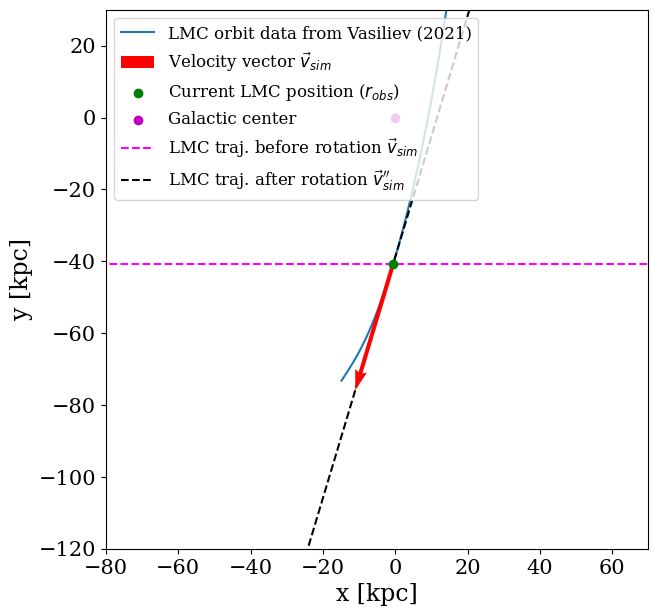

In [28]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

fig, ax = plt.subplots(figsize=(7,7))
plt.plot(orbit['x'], orbit['y'], label='LMC orbit data from Vasiliev (2021)', zorder = 1)
#axs[0, 0].quiver(origin[0], origin[1], today[0] * 30000000, today[1] * 30000000, angles='xy', scale_units='xy', color='r',  width=0.009)
plt.quiver(
    origin[0], origin[1],
    Ux, Uy,
    angles='xy', scale_units='xy', scale=3,
    pivot='tail', color='r', label=r"Velocity vector $\vec{v}_{sim}$", zorder = 4
)
plt.xlim(-80, 70)
plt.ylim(-120, 30)
plt.xlabel('x [kpc]', size=17)
plt.ylabel('y [kpc]', size=17)
plt.tick_params(axis='both', labelsize=15)
plt.scatter(origin[0], origin[1], color='g', label= r'Current LMC position ($r_{obs}$)', zorder = 5)
plt.scatter(0, 0, color='m', label='Galactic center')
plt.plot(line1[0]+origin[0], line1[1]+origin[1], color='magenta', linestyle='dashed', label= r"LMC traj. before rotation $\vec{v}_{sim}$", zorder = 2)
plt.plot(line2[0]+origin[0], line2[1]+origin[1], color='black', linestyle='dashed', label= r"LMC traj. after rotation $\vec{v}_{sim}''$", zorder = 3)
plt.legend(loc= 'upper left', prop={'size': 12})

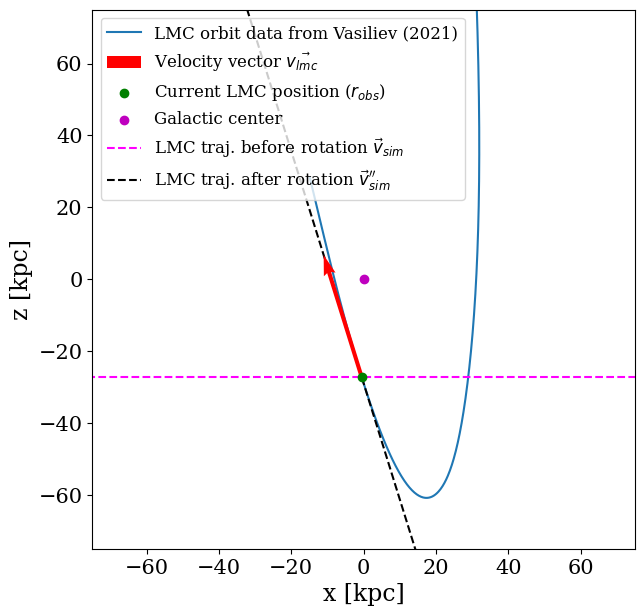

In [27]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

fig, ax = plt.subplots(figsize=(7,7))
plt.plot(orbit['x'], orbit['z'], label='LMC orbit data from Vasiliev (2021)', zorder = 1)
plt.xlim(-75, 75)
plt.ylim(-75, 75)
plt.quiver(
    origin[0], origin[2],
    Ux, Uz,
    angles='xy', scale_units='xy', scale=3,
    pivot='tail', color='r', label=r"Velocity vector $\vec{v_{lmc}}$", zorder = 4
)
plt.tick_params(axis='both', labelsize=15)
plt.xlabel('x [kpc]', size=17)
plt.ylabel('z [kpc]', size=17)
plt.scatter(origin[0], origin[2], color='g', label= r'Current LMC position ($r_{obs}$)', zorder = 5)
plt.scatter(0, 0, color='m', label='Galactic center')
plt.plot(line1[0]+origin[0], line1[2]+origin[2], color='magenta', linestyle='dashed', label= r"LMC traj. before rotation $\vec{v}_{sim}$", zorder = 2)
plt.plot(line2[0]+origin[0], line2[2]+origin[2], color='black', linestyle='dashed', label= r"LMC traj. after rotation $\vec{v}_{sim}''$", zorder = 3)
plt.legend(prop={'size': 12})

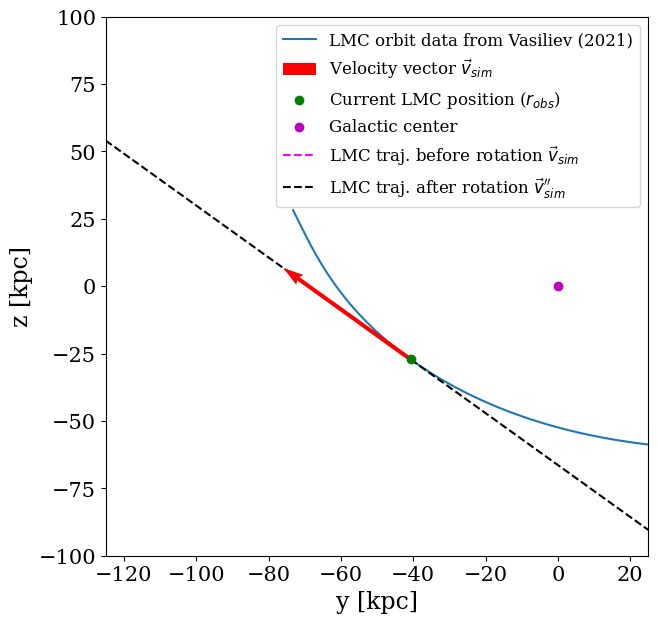

In [29]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

fig, ax = plt.subplots(figsize=(7,7))
plt.plot(orbit['y'], orbit['z'], label='LMC orbit data from Vasiliev (2021)', zorder = 1)
plt.xlim(-125, 25)
plt.ylim(-100, 100)
plt.quiver(
    origin[1], origin[2],
    Uy, Uz,
    angles='xy', scale_units='xy', scale=3,
    pivot='tail', color='r', label= r"Velocity vector $\vec{v}_{sim}$", zorder = 4
)
plt.tick_params(axis='both', labelsize=15)
plt.xlabel('y [kpc]', size=17)
plt.ylabel('z [kpc]', size=17)
plt.scatter(origin[1], origin[2], color='g', label= r'Current LMC position ($r_{obs}$)', zorder = 5)
plt.scatter(0, 0, color='m', label='Galactic center')
plt.plot(line1[1]+origin[1], line1[2]+origin[2], color='magenta', linestyle='dashed', label= r"LMC traj. before rotation $\vec{v}_{sim}$", zorder = 2)
plt.plot(line2[1]+origin[1], line2[2]+origin[2], color='black', linestyle='dashed', label= r"LMC traj. after rotation $\vec{v}_{sim}''$", zorder = 3)
plt.legend(prop={'size': 12})

In [19]:
breakpoint

<function breakpoint>

2.4.2 Plotting the rotation

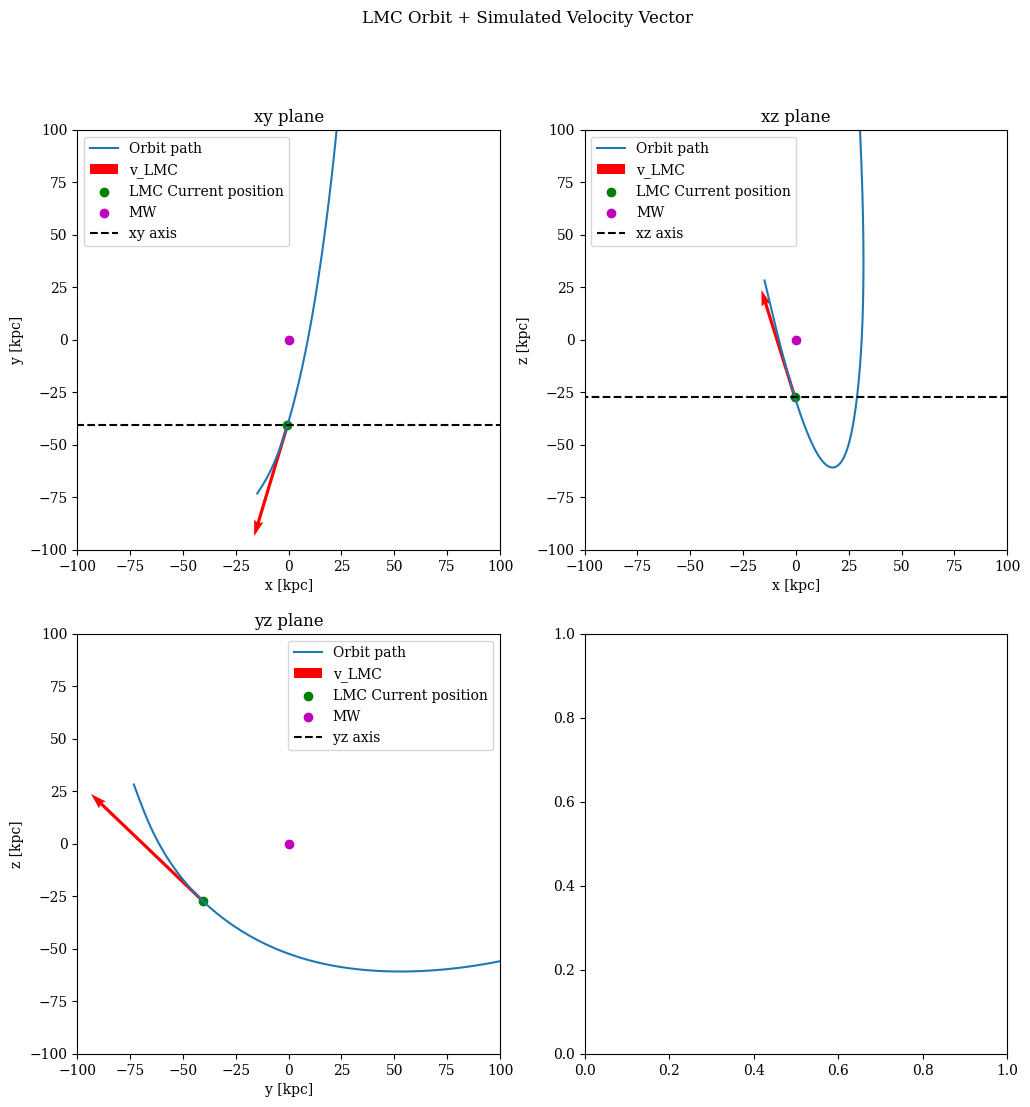

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('LMC Orbit + Simulated Velocity Vector')

axs[0, 0].plot(orbit['x'], orbit['y'])
#axs[0, 0].quiver(origin[0], origin[1], today[0] * 30000000, today[1] * 30000000, angles='xy', scale_units='xy', color='r',  width=0.009)
axs[0,0].quiver(
    origin[0], origin[1],
    Ux, Uy,
    angles='xy', scale_units='xy', scale=2,
    pivot='tail', color='r'
)
axs[0,0].set_title('xy plane')
axs[0,0].set_xlabel('x [kpc]')
axs[0,0].set_ylabel('y [kpc]')
axs[0,0].set_xlim(-100, 100)
axs[0,0].set_ylim(-100, 100)
axs[0, 0].scatter(origin[0], origin[1], color='g', label='Current position')
axs[0, 0].scatter(0, 0, color='m', label='Plot Origin')
axs[0, 0].plot(line1[0]+origin[0], line1[1]+origin[1], color='black', linestyle='dashed', label='xy axis')
axs[0,0].legend(['Orbit path', 'v_LMC', 'LMC Current position', 'MW', 'xy axis'])



axs[0, 1].plot(orbit['x'], orbit['z'])
axs[0,1].set_xlim(-100, 100)
axs[0,1].set_ylim(-100, 100)
axs[0,1].quiver(
    origin[0], origin[2],
    Ux, Uz,
    angles='xy', scale_units='xy', scale=2,
    pivot='tail', color='r'
)
axs[0,1].set_title('xz plane')
axs[0,1].set_xlabel('x [kpc]')
axs[0,1].set_ylabel('z [kpc]')
axs[0, 1].scatter(origin[0], origin[2], color='g', label='Current position')
axs[0, 1].scatter(0, 0, color='m', label='MW')
axs[0, 1].plot(line1[0]+origin[0], line1[2]+origin[2], color='black', linestyle='dashed', label='xz axis')
axs[0, 1].legend(['Orbit path', 'v_LMC', 'LMC Current position', 'MW', 'xz axis'])


axs[1, 0].plot(orbit['y'], orbit['z'])
axs[1,0].set_xlim(-100, 100)
axs[1,0].set_ylim(-100, 100)
axs[1, 0].quiver(
    origin[1], origin[2],
    Uy, Uz,
    angles='xy', scale_units='xy', scale=2,
    pivot='tail', color='r'
)
axs[1,0].set_title('yz plane')
axs[1,0].set_xlabel('y [kpc]')
axs[1,0].set_ylabel('z [kpc]')
axs[1, 0].scatter(origin[1], origin[2], color='g', label='Current position')
axs[1, 0].scatter(0, 0, color='m', label='MW')
axs[1, 0].plot(line1[1]+origin[1], line1[2]+origin[2], color='black', linestyle='dashed', label='yz axis')
axs[1, 0].legend(['Orbit path', 'v_LMC', 'LMC Current position', 'MW', 'yz axis'])

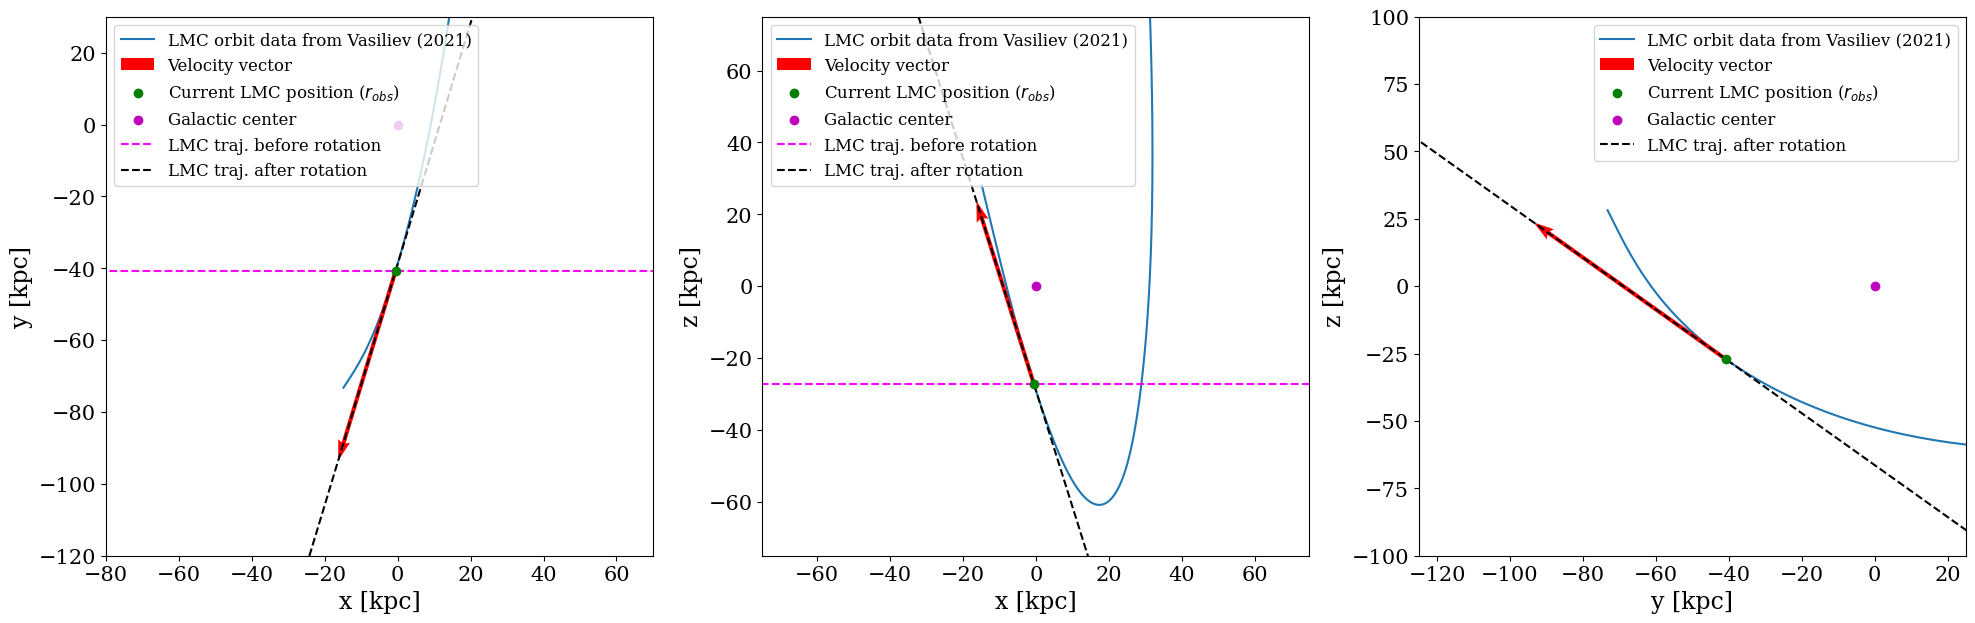

In [21]:
# Visualizing velocity vectors on the orbit to see what direction I need to rotate the simulations
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

#xy, xz, yz axis refers to the x axis line as seen on the respective 2D views. xy axis means the x axis line as seen depicted on the xy plot, etc. 

fig, axs = plt.subplots(1, 3, figsize=(24, 7))

axs[0].plot(orbit['x'], orbit['y'], label='LMC orbit data from Vasiliev (2021)', zorder = 1)
#axs[0, 0].quiver(origin[0], origin[1], today[0] * 30000000, today[1] * 30000000, angles='xy', scale_units='xy', color='r',  width=0.009)
axs[0].quiver(
    origin[0], origin[1],
    Ux, Uy,
    angles='xy', scale_units='xy', scale=2,
    pivot='tail', color='r', label='Velocity vector', zorder = 3
)
axs[0].set_xlim(-80, 70)
axs[0].set_ylim(-120, 30)
axs[0].set_xlabel('x [kpc]', size=17)
axs[0].set_ylabel('y [kpc]', size=17)
axs[0].tick_params(axis='both', labelsize=15)
axs[0].scatter(origin[0], origin[1], color='g', label= r'Current LMC position ($r_{obs}$)', zorder = 5)
axs[0].scatter(0, 0, color='m', label='Galactic center')
axs[0].plot(line1[0]+origin[0], line1[1]+origin[1], color='magenta', linestyle='dashed', label='LMC traj. before rotation', zorder = 2)
axs[0].plot(line2[0]+origin[0], line2[1]+origin[1], color='black', linestyle='dashed', label='LMC traj. after rotation', zorder = 4)
axs[0].legend(loc= 'upper left', prop={'size': 12})



axs[1].plot(orbit['x'], orbit['z'], label='LMC orbit data from Vasiliev (2021)', zorder = 1)
axs[1].set_xlim(-75, 75)
axs[1].set_ylim(-75, 75)
axs[1].quiver(
    origin[0], origin[2],
    Ux, Uz,
    angles='xy', scale_units='xy', scale=2,
    pivot='tail', color='r', label='Velocity vector', zorder = 3
)
axs[1].tick_params(axis='both', labelsize=15)
axs[1].set_xlabel('x [kpc]', size=17)
axs[1].set_ylabel('z [kpc]', size=17)
axs[1].scatter(origin[0], origin[2], color='g', label= r'Current LMC position ($r_{obs}$)', zorder = 5)
axs[1].scatter(0, 0, color='m', label='Galactic center')
axs[1].plot(line1[0]+origin[0], line1[2]+origin[2], color='magenta', linestyle='dashed', label='LMC traj. before rotation', zorder = 2)
axs[1].plot(line2[0]+origin[0], line2[2]+origin[2], color='black', linestyle='dashed', label='LMC traj. after rotation', zorder = 4)
axs[1].legend(prop={'size': 12})


axs[2].plot(orbit['y'], orbit['z'], label='LMC orbit data from Vasiliev (2021)', zorder = 1)
axs[2].set_xlim(-125, 25)
axs[2].set_ylim(-100, 100)
axs[2].quiver(
    origin[1], origin[2],
    Uy, Uz,
    angles='xy', scale_units='xy', scale=2,
    pivot='tail', color='r', label='Velocity vector', zorder = 3
)
axs[2].tick_params(axis='both', labelsize=15)
axs[2].set_xlabel('y [kpc]', size=17)
axs[2].set_ylabel('z [kpc]', size=17)
axs[2].scatter(origin[1], origin[2], color='g', label= r'Current LMC position ($r_{obs}$)', zorder = 5)
axs[2].scatter(0, 0, color='m', label='Galactic center')
axs[0].plot(line1[1]+origin[1], line1[2]+origin[2], color='magenta', linestyle='dashed', label='LMC traj. before rotation', zorder = 2)
axs[2].plot(line2[1]+origin[1], line2[2]+origin[2], color='black', linestyle='dashed', label='LMC traj. after rotation', zorder = 4)
axs[2].legend(prop={'size': 12})

In [22]:
r_z, r_y = angle_finder(v70)

linething = np.array([np.linspace(-300, 300, 31), np.zeros(31), np.zeros(31)])
R_LMC = (rz(math.radians(r_z)) @ ry(math.radians(r_y)))
lineLMC = R_LMC @ linething

# This is for the velocity vector for the point in LMC's orbit at a radial dist. 70kpc from the MW center
vx_lmc, vy_lmc, vz_lmc = v70[0], v70[1], v70[2]
factor = 150  # how long you want the arrow in kpc-units space
length = (vx_lmc**2 + vy_lmc**2 + vz_lmc**2)**0.5
Ux_lmc, Uy_lmc, Uz_lmc = vx_lmc/length * factor, vy_lmc/length * factor, vz_lmc/length * factor
speed_lmc = np.array([Ux_lmc, Uy_lmc, Uz_lmc]) 


Rz = -98.38192060960003, Ry = -5.918706233387963


In [23]:
a = (origin - r70)
v_n = v70 / np.linalg.norm(v70)

d_par = np.dot(a, v_n)*v_n
d_perp = a - d_par

destination = (origin[0]-d_perp[0], origin[1]-d_perp[1], origin[2]-d_perp[2])

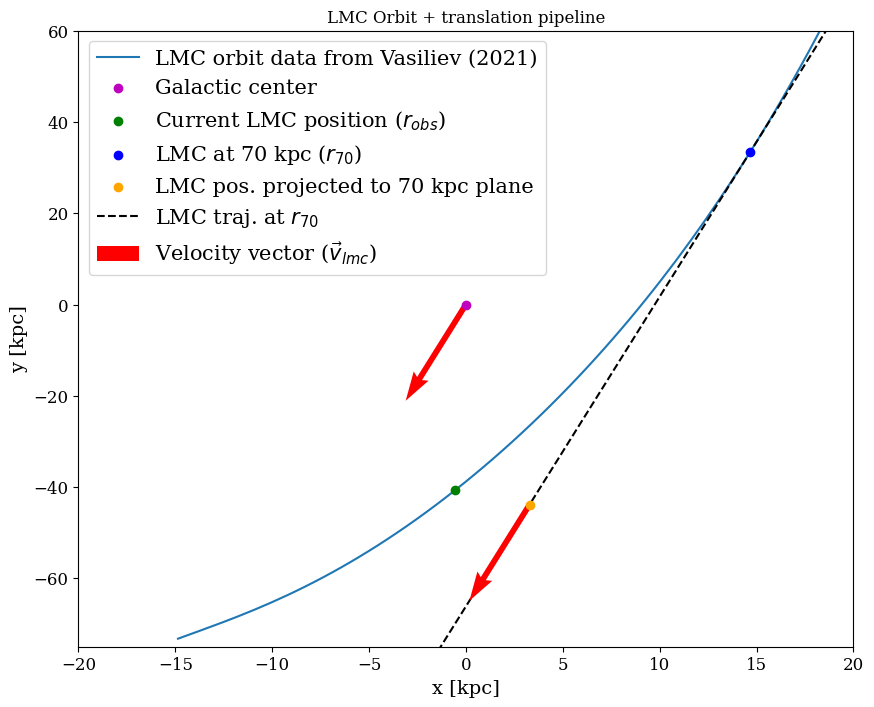

In [24]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')


fig, ax = plt.subplots(figsize=(10,8))
plt.plot(orbit['x'], orbit['y'], label='LMC orbit data from Vasiliev (2021)', zorder = 1)
plt.scatter(0,0, color='m',label='Galactic center', zorder = 6)
plt.scatter(origin[0], origin[1], color='g', label= r'Current LMC position ($r_{obs}$)', zorder = 4)
plt.scatter(r70[0], r70[1], color='b', label= r'LMC at 70 kpc ($r_{70}$)', zorder = 5)
plt.scatter(destination[0], destination[1], color='orange', label='LMC pos. projected to 70 kpc plane', zorder = 8)
plt.plot(lineLMC[0]+r70[0], lineLMC[1]+r70[1], color='black', linestyle='dashed', label= r'LMC traj. at $r_{70}$', zorder = 2)
plt.quiver(
    0, 0,
    Ux_lmc, Uy_lmc,
    angles='xy', scale_units='xy', scale=7,
    pivot='tail', color='r', label=r'Velocity vector ($\vec{v}_{lmc}$)', zorder = 3
)

plt.quiver(
    destination[0], destination[1],
    Ux_lmc, Uy_lmc,
    angles='xy', scale_units='xy', scale=7,
    pivot='tail', color='r', zorder = 7
)
ax.tick_params(axis='both', labelsize=12)
plt.xlim(-20, 20)
plt.ylim(-75, 60)
plt.xlabel('x [kpc]', size=14)
plt.ylabel('y [kpc]', size=14)
plt.title('LMC Orbit + translation pipeline')
plt.legend(prop={'size': 15})

In [25]:
a = np.array([1, 0, 0])

f =rz(math.radians(135)) @ a

In [26]:
LMC_sim = np.array([x_sim-120, y_sim, z_sim])

LMC_sim_rot = R @ LMC_sim


line2111 = np.array([np.linspace(-300, 300, 31), np.zeros(31), np.zeros(31)])
#line211 = np.array([np.linspace(-300, 0, 31), np.zeros(31), np.zeros(31)])
#line2111 = R @ line211
#line2111 = line2111.T + [285, -100, 200]
#line2111 = line2111.T



NameError: name 'x_sim' is not defined

In [ ]:
plot1 = plt.hist2d(x_sim - 120, y_sim, bins=(35, 35))

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('LMC Orbit + Mock Wake LMC Histogram')
bins = (65, 65)
color_orbit = 'turquoise'
color_axis = 'indianred'
color_cmap = 'viridis'
color_velocity = 'ivory'
color_current_pos = 'tomato'

# XY
h_xy, xed, yed, im_xy = axs[0,0].hist2d(LMC_sim[0] + origin[0], LMC_sim[1] + origin[1], bins = bins, cmap = color_cmap)


axs[0, 0].hist2d(LMC_sim_rot[0] + origin[0], LMC_sim_rot[1] + origin[0], bins = bins, cmap = color_cmap, zorder = 1)
axs[0, 0].plot(orbit['x'], orbit['y'],  color = color_orbit, zorder = 2)
axs[0, 0].plot(line2[0]+origin[0], line2[1]+origin[1], color=color_axis, linestyle='dashed', label='xy axis', zorder = 3)
axs[0, 0].scatter(origin[0], origin[1], color=color_current_pos, label='Current position', zorder = 4)
axs[0,0].quiver(
    origin[0], origin[1],
    Ux, Uy,
    angles='xy', scale_units='xy', scale=1,
    pivot='tail', color=color_velocity, zorder=5
)
axs[0, 0].plot(line2111[0], line2111[1], color='black', linestyle='dashed', label='xy axis', zorder = 6)
cbar = plt.colorbar(im_xy, ax=axs[0,0])
axs[0,0].set_title('xy plane')
axs[0,0].set_xlabel('x [kpc]')
axs[0,0].set_ylabel('y [kpc]')
cbar.set_label('Number of stars', rotation=270, labelpad=20)
axs[0,0].legend(['Orbit path', 'x axis', 'LMC Current position', 'Velocity vector', 'x axis 2'])


#XZ
h_xz, xed, yed, im_xz = axs[0,1].hist2d(LMC_sim[0] + origin[0], LMC_sim[2] + origin[2], bins = bins, cmap = color_cmap)


axs[0, 1].hist2d(LMC_sim_rot[0] + origin[0], LMC_sim_rot[2] + origin[2], bins = bins, cmap = color_cmap, zorder = 1)
axs[0, 1].plot(orbit['x'], orbit['z'], color = color_orbit, zorder = 2)
axs[0, 1].plot(line2[0]+origin[0], line2[2]+origin[2], color= color_axis, linestyle='dashed', label='xz axis', zorder = 3)
axs[0, 1].scatter(origin[0], origin[2], color= color_current_pos, label='Current position', zorder = 4)
axs[0,1].quiver(
    origin[0], origin[2],
    Ux, Uz,
    angles='xy', scale_units='xy', scale=1,
    pivot='tail', color= color_velocity, zorder = 5
)
axs[0, 1].plot(line2111[0]+origin[0], line2111[2]+origin[2], color='black', linestyle='dashed', label='xy axis', zorder = 6)
cbar = plt.colorbar(im_xz, ax=axs[0,1])
cbar.set_label('Number of stars', rotation=270, labelpad=20)
axs[0,1].set_title('xz plane')
axs[0,1].set_xlabel('x [kpc]')
axs[0,1].set_ylabel('z [kpc]')


axs[0, 1].legend(['Orbit path', 'x axis', 'LMC Current position', 'Velocity vector'])

#YZ

h_yz, xed, yed, im_yz = axs[1, 0].hist2d(LMC_sim[1] + origin[1], LMC_sim[2] + origin[2], bins = bins, cmap = color_cmap)


axs[1, 0].hist2d(LMC_sim_rot[1] + origin[1], LMC_sim_rot[2] + origin[2], bins = bins, cmap = color_cmap, zorder = 1)
axs[1, 0].plot(orbit['y'], orbit['z'], color = color_orbit, zorder = 2)
axs[1, 0].plot(line2[1]+origin[1], line2[2]+origin[2], color = color_axis, linestyle='dashed', label='yz axis', zorder = 3)
axs[1, 0].scatter(origin[1], origin[2], color= color_current_pos, label='LMC Current position', zorder = 4)
axs[1, 0].quiver(
    origin[1], origin[2],
    Uy, Uz,
    angles='xy', scale_units='xy', scale=1,
    pivot='tail', color = color_velocity, zorder = 5
)
axs[1, 0].plot(line2111[1]+origin[1], line2111[2]+origin[2], color='black', linestyle='dashed', label='xy axis', zorder = 6)
cbar = plt.colorbar(im_yz, ax=axs[1,0])
cbar.set_label('Number of stars', rotation=270, labelpad=20)
axs[1,0].set_title('yz plane')
axs[1,0].set_xlabel('y [kpc]')
axs[1,0].set_ylabel('z [kpc]')

axs[1, 0].legend(['Orbit path', 'x axis', 'LMC Current position', 'Velocity vector'])


SkyCoord objects

In [ ]:
# Rotated simulatsiooni data
lmc_coord_rot = SkyCoord(LMC_sim_rot[:,0], LMC_sim_rot[:,1], LMC_sim_rot[:,2], frame = 'galactocentric',unit='kpc', representation_type='cartesian')


orbit_galcen = SkyCoord(orbit[orbit.time < 0]['x'], orbit[orbit.time < 0]['y'], orbit[orbit.time < 0]['z'], frame = 'galactocentric',unit='kpc', representation_type='cartesian')


In [ ]:
LMC_pos = SkyCoord(origin[0], origin[1], origin[2], frame = 'galactocentric', unit='kpc', representation_type='cartesian')



In [ ]:
LMC_x_ax = SkyCoord(line2[0]+origin[0], line2[1]+origin[1], line2[2]+origin[2], frame = 'galactocentric', unit='kpc', representation_type='cartesian')


LMC_x_ax2 = SkyCoord(line2111[0]+origin[0], line2111[1]+origin[1], line2111[2]+origin[2], frame = 'galactocentric', unit='kpc', representation_type='cartesian')


ax_lmc = SkyCoord(line2111[0], line2111[1], line2111[2], frame = 'galactocentric', unit='kpc', representation_type='cartesian')


Check why the edges happen. 
    * look into how the SkyCoord object works
    * understand the weird patterns in the galactic coordinates. 
        * color code by distance by plotting the x axis in the galactic coordinates plot
    

In [ ]:
# mister owl lol
LMC_l = -lmc_coord_rot.galactic.l.wrap_at(180*u.deg).value
LMC_b = lmc_coord_rot.galactic.b.value
LMC_hist = plt.hist2d(LMC_l, LMC_b, (25, 25))
plt.colorbar()


In [ ]:

# plt.figure(figsize=(8, 4.5))
# ax = plt.subplot(111, projection="mollweide")

# ax.plot(-lmc_coord_rot.galactic.l.wrap_at(180*u.deg).radian, 
#         lmc_coord_rot.galactic.b.radian, 'k.', markersize = 0.1 ,zorder = 2)
# ax.scatter(-LMC_pos.galactic.l.wrap_at(180*u.deg).radian, LMC_pos_gal.galactic.b.radian, 'co', markersize=7, label='LMC current pos', zorder = 3)
# #ax.plot(-LMC_x_ax_gal.galactic.l.wrap_at('180d').radian, LMC_x_ax_gal.galactic.b.radian, 'b', markersize=10, label='LMC orbit tangent', zorder = 2)
# ax.plot(-orbit_galcen.galactic.l.wrap_at(180*u.deg).radian, orbit_galcen.galactic.b.radian, label = 'LMC orbit',color = 'turquoise', zorder = 4)
# ax.set_xlabel('l [rad]')
# ax.set_ylabel('b [rad]')
# ax.set_title('LMC mock wake mollweide projection')
# ax.legend( loc='lower right')
# ax.grid(True, zorder = 1)

In [ ]:
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111)

# h, xed, yed, im = ax.hist2d(LMC_l, LMC_b, bins = bins, cmap = color_cmap)

# ax.set_title('LMC mock wake l and b histogram test plot')
# ax.hist2d(LMC_l, LMC_b, (25, 25), zorder = 1)
# ax.plot(LMC_x_ax_gal.galactic.l.wrap_at('180d').radian, LMC_x_ax_gal.galactic.b.radian, 'b', markersize=10, label='LMC x axis', zorder = 2)
# ax.plot(LMC_pos_gal.galactic.l.wrap_at('180d').radian, LMC_pos_gal.galactic.b.radian, 'ro', markersize=10, label='LMC current pos', zorder = 3)
# ax.plot(LMC_x_ax2_gal.galactic.l.wrap_at('180d').radian, LMC_x_ax2_gal.galactic.b.radian, 'g', markersize=10, label='LMC x axis 2', zorder = 5)
# ax.legend( loc='upper right')
# cbar = plt.colorbar(im)
# cbar.set_label('Number of stars', rotation=270, labelpad=20)



# Testing ground

Trying to understand what is going on in the Mollweide projection, where does it go wrong?

In [ ]:
xxx = (0, 0, 0)
yyy = (10, 0, 0)
zzz = (50, 0, 0)
aaa = (100, 0, 0)
kriipsujuku = np.array([np.linspace(-30, 30, 31), np.zeros(31), np.zeros(31)])

xxx_sky = SkyCoord(xxx[0], xxx[1], xxx[2], unit='kpc', representation_type='cartesian')
xxx_sky_gal = xxx_sky.galactic

yyy_sky = SkyCoord(yyy[0], yyy[1], yyy[2], unit='kpc', representation_type='cartesian')
yyy_sky_gal = yyy_sky.galactic

zzz_sky = SkyCoord(zzz[0], zzz[1], zzz[2], unit='kpc', representation_type='cartesian')
zzz_sky_gal = zzz_sky.galactic

aaa_sky = SkyCoord(aaa[0], aaa[1], aaa[2], unit='kpc', representation_type='cartesian')
aaa_sky_gal = aaa_sky.galactic

kj = SkyCoord(kriipsujuku[0], kriipsujuku[1], kriipsujuku[2], unit='kpc', representation_type='cartesian')
kj_gal = kj.galactic


In [ ]:

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="mollweide")

ax.scatter(xxx_sky_gal.galactic.l.wrap_at('180d').radian, xxx_sky_gal.galactic.b.radian, c='y', s=10, label='xxx', zorder = 2)
ax.scatter(zzz_sky_gal.galactic.l.wrap_at('180d').radian, zzz_sky_gal.galactic.b.radian, c='orange', s=10, label='zzz', zorder = 3)

ax.plot(kj_gal.galactic.l.wrap_at('180d').radian, kj_gal.galactic.b.radian, 'm', label='line', zorder = 4)
ax.scatter(yyy_sky_gal.galactic.l.wrap_at('180d').radian, yyy_sky_gal.galactic.b.radian, c='c', s=10, label='yyy', zorder = 5)

ax.set_xlabel('l [rad]')
ax.set_ylabel('b [rad]')
ax.set_title('Test plot')
ax.legend( loc='lower right')
ax.grid(True)
fig.show()


In [ ]:
plot2 = plt.hist2d(mock1[0]-120, mock1[1], bins = (35, 35))

In [ ]:
plot1 = plt.hist2d(x_sim - 120, y_sim, bins=(35, 35))

In [ ]:
# r_z, r_y = angle_finder(v70)

# linething = np.array([np.linspace(-300, 300, 31), np.zeros(31), np.zeros(31)])
# R_LMC = (rz(math.radians(r_z)) @ ry(math.radians(r_y)))
# lineLMC = R_LMC @ linething

# # This is for the velocity vector for the point in LMC's orbit at a radial dist. 70kpc from the MW center
# vx_lmc, vy_lmc, vz_lmc = v70[0], v70[1], v70[2]
# factor = 150  # how long you want the arrow in kpc-units space
# length = (vx_lmc**2 + vy_lmc**2 + vz_lmc**2)**0.5
# Ux_lmc, Uy_lmc, Uz_lmc = vx_lmc/length * factor, vy_lmc/length * factor, vz_lmc/length * factor
# speed_lmc = np.array([Ux_lmc, Uy_lmc, Uz_lmc]) 

In [ ]:
a = (origin - r70)
v_n = v70 / np.linalg.norm(v70)

d_par = np.dot(a, v_n)*v_n
d_perp = a - d_par

In [ ]:
# plt.plot(orbit['x'], orbit['y'])
# #axs[0, 0].quiver(origin[0], origin[1], today[0] * 30000000, today[1] * 30000000, angles='xy', scale_units='xy', color='r',  width=0.009)
# plt.quiver(
#     origin[0], origin[1],
#     Ux_lmc, Uy_lmc,
#     angles='xy', scale_units='xy', scale=5,
#     pivot='tail', color='r', label='LMC velocity vector'
# )

# plt.title('xy plane')
# plt.xlabel('x [kpc]')
# plt.ylabel('y [kpc]')
# plt.xlim(-25, 30)
# plt.ylim(-100, 50)
# plt.scatter(r70[0], r70[1], color='b', label='70 kpc position')
# plt.scatter(origin[0], origin[1], color='g', label='Current position')
# plt.scatter(0, 0, color='m', label='MW')
# plt.scatter(origin[0]-d_perp[0], origin[1]-d_perp[1], color='orange', label='Destination point')
# #plt.plot(line2[0]+origin[0], line2[1]+origin[1], color='black', linestyle='dashed', label='xy axis')
# plt.plot(lineLMC[0]+r70[0], lineLMC[1]+r70[1], color='orange', linestyle='dashed', label='70 kpc x axis')
# plt.legend()


fig, axs = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Simulation box translation visualization')

axs[0, 0].plot(orbit['x'], orbit['y'])
#axs[0, 0].quiver(origin[0], origin[1], today[0] * 30000000, today[1] * 30000000, angles='xy', scale_units='xy', color='r',  width=0.009)
axs[0,0].quiver(
    0, 0,
    Ux_lmc, Uy_lmc,
    angles='xy', scale_units='xy', scale=5,
    pivot='tail', color='r', label='LMC velocity vector'
)

axs[0,0].set_title('xy plane')
axs[0,0].set_xlabel('x [kpc]')
axs[0,0].set_ylabel('y [kpc]')
axs[0,0].set_xlim(-40, 30)
axs[0,0].set_ylim(-100, 50)
axs[0,0].scatter(r70[0], r70[1], color='b', label='70 kpc position')
axs[0, 0].scatter(origin[0], origin[1], color='g', label='Current position')
axs[0, 0].scatter(0, 0, color='m', label='Initial position')
axs[0, 0].plot(lineLMC[0]+r70[0], lineLMC[1]+r70[1], color='orange', linestyle='dashed', label='70 kpc x axis')
axs[0,0].scatter(origin[0]-d_perp[0], origin[1]-d_perp[1], color='orange', label='Destination point')
axs[0,0].legend()


axs[0, 1].plot(orbit['x'], orbit['y'])
#axs[0, 0].quiver(origin[0], origin[1], today[0] * 30000000, today[1] * 30000000, angles='xy', scale_units='xy', color='r',  width=0.009)
axs[0,1].quiver(
    origin[0], origin[1],
    Ux_lmc, Uy_lmc,
    angles='xy', scale_units='xy', scale=5,
    pivot='tail', color='r', label='LMC velocity vector'
)

axs[0,1].set_title('xy plane')
axs[0,1].set_xlabel('x [kpc]')
axs[0,1].set_ylabel('y [kpc]')
axs[0,1].set_xlim(-40, 30)
axs[0,1].set_ylim(-100, 50)
axs[0,1].scatter(r70[0], r70[1], color='b', label='70 kpc position')
axs[0, 1].scatter(origin[0], origin[1], color='g', label='Current position')
axs[0, 1].scatter(0, 0, color='m', label='MW')
axs[0, 1].plot(lineLMC[0]+r70[0], lineLMC[1]+r70[1], color='orange', linestyle='dashed', label='70 kpc x axis')
axs[0,1].scatter(origin[0]-d_perp[0], origin[1]-d_perp[1], color='orange', label='Destination point')
axs[0,1].legend()

